In [20]:
import pandas as pd

import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# localizando o csv fora do folder e criando um dataframe
path = '../cola.csv'
df = pd.read_csv(path)

# removendo as últimas colunas da base de dados
df = df.iloc[:, :5]
# removendo as colunas 'machine' e 'timestamp' da base de dados
df.drop(columns=['machine', 'timestamp'], inplace=True)

# rotacionando o df para tornar os 'ids' colunas
df = df.pivot_table('value', 'packet_timestamp', 'id')

# convertendo o ts em int e depois em data
df.index = df.index.astype(str).str[:-3].astype(np.int64)
df['date'] = df.index.map(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))

# selecionando apenas as variáveis de interesse: date e pressao_max
df.index.name = None
df = df[['date', 'PressureMax_d1']]

df.head()

id,date,PressureMax_d1
1615743247,2021-03-14 14:34:07,109.0
1615752171,2021-03-14 17:02:51,109.0
1615752230,2021-03-14 17:03:50,103.0
1615752298,2021-03-14 17:04:58,101.0
1615752911,2021-03-14 17:15:11,104.0


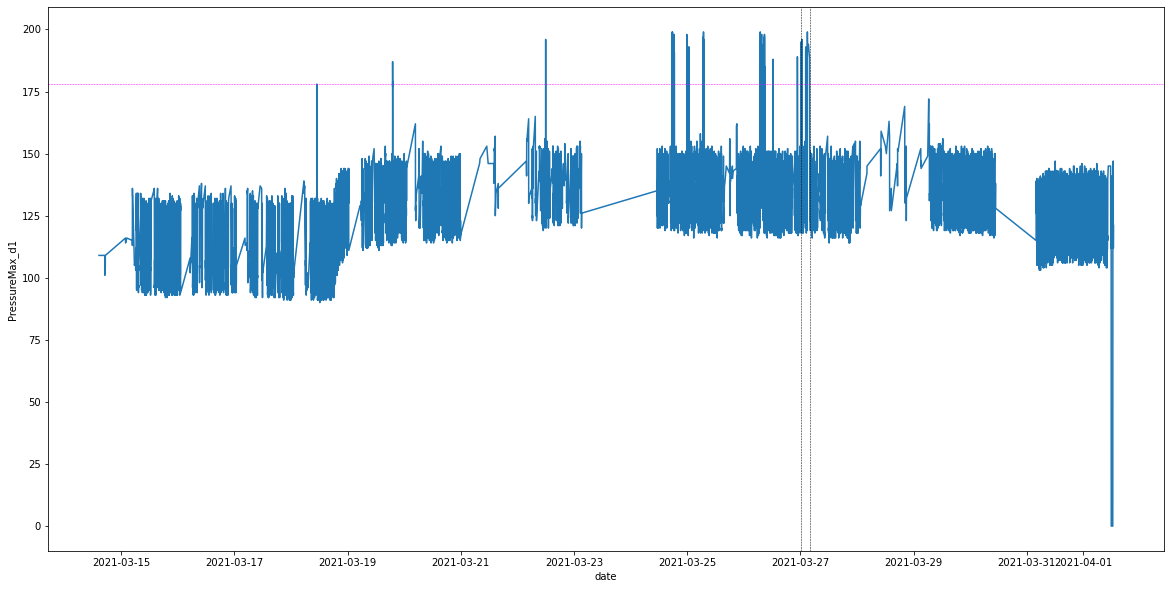

In [61]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x='date', y='PressureMax_d1')
plt.axhline(y=178, color='magenta', linestyle='--', lw = 0.5)
plt.axvline(x=datetime.datetime(2021, 3, 27, 0, 3, 0), color='k', linestyle='--', lw = 0.5)
plt.axvline(x=datetime.datetime(2021, 3, 27, 3, 53, 0), color='k', linestyle='--', lw = 0.5);

In [62]:
df['mm_25'] = df.PressureMax_d1.rolling(25).mean()
df['mm_50'] = df.PressureMax_d1.rolling(50).mean()
df['mm_100'] = df.PressureMax_d1.rolling(100).mean()
df.tail()

id,date,PressureMax_d1,mm_25,mm_50,mm_100
1617291720,2021-04-01 12:42:00,112.0,112.68,116.32,117.37
1617291779,2021-04-01 12:42:59,113.0,111.40,116.44,117.43
1617291813,2021-04-01 12:43:33,120.0,110.72,116.54,117.56
1617291871,2021-04-01 12:44:31,121.0,111.00,116.58,117.69
1617291932,2021-04-01 12:45:32,121.0,111.24,116.60,117.75


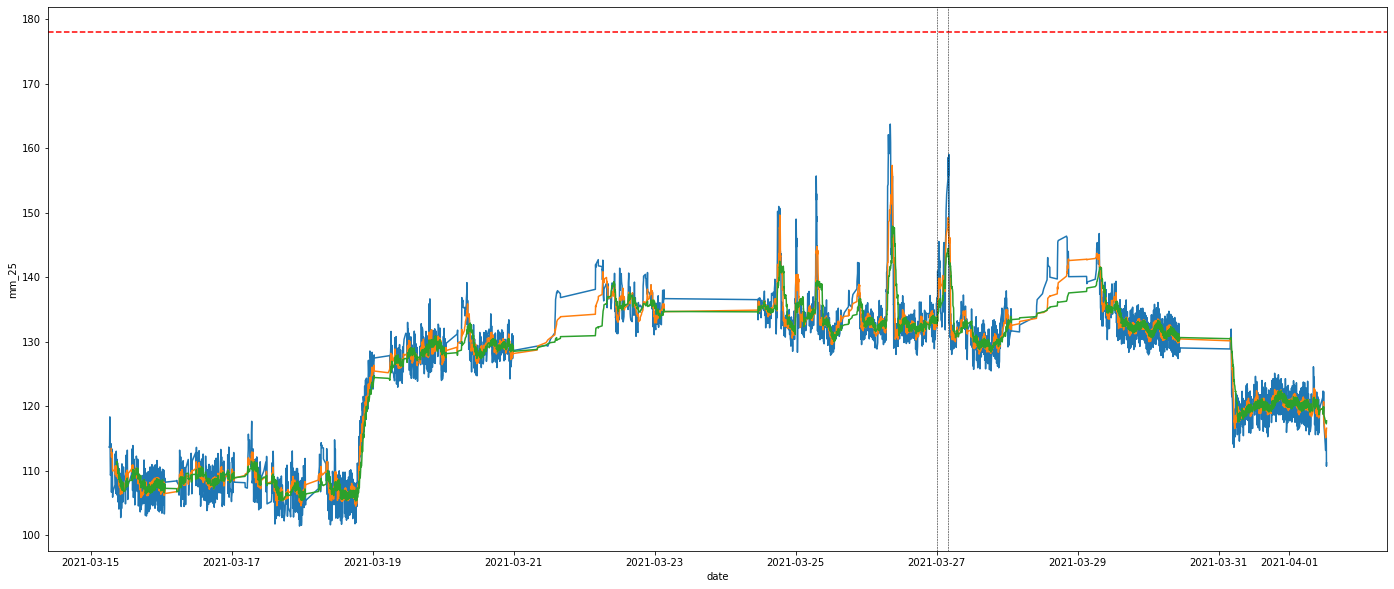

In [63]:
plt.figure(figsize=(24, 10))
sns.lineplot(data=df, x='date', y='mm_25')
sns.lineplot(data=df, x='date', y='mm_50')
sns.lineplot(data=df, x='date', y='mm_100')
plt.axhline(y=178, color='r', linestyle='--')
plt.axvline(x=datetime.datetime(2021, 3, 27, 0, 3, 0), color='k', linestyle='--', lw = 0.5)
plt.axvline(x=datetime.datetime(2021, 3, 27, 3, 53, 0), color='k', linestyle='--', lw = 0.5);